In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
#Question 1 will be what is the most popular chess opening and what are the best alternatives
#Q1 outcome variable will be most_played, second_popular, third_popular
#To explore the outcome varaible most_played, I plan to look at how many times an opening is played,
#Q1 will contain the following models: times opening played(opening_name variable) and which opening (opening_name)


#For all of these questions, I will also develop functions to help in my analyses


In [3]:
#Question 2 will be which chess opening results are definitive: win or loss (no draws), and how many wins and losses are there in the dataset
#Question 2 will have the outcome variable opening_wins to detect which opening has the most definitive conclusions
#To explore the outcome variable, I plan to look at the opening_names and see which opening contains the most "win","loss","draw" for the top 3 most popular openings as found in Q1
#Q2 will contain the following models: times opening played, how many wins per top 3 openings

In [4]:
#Question 3 will be which chess opening results in the most and which has the least amount of moves
#Q3 outcome variable will be most_moves and least_moves
#To explore the outcome variable, I plan to look at the average amount of moves for the entire dataset, the opening which has the average of most moves, and the opening with the least moves
#To explore this, I will use pivot tables
#Q3 will contain the following models: average moves per top openings and the min/max for each too

In [5]:
#This is code to read and get some basic info on the chess set
chess_set = pd.read_csv("/kaggle/input/chess/games.csv")
print(chess_set.head())
chess_set.info()

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

Van't Kruijs Opening                368
Sicilian Defense                    358
Sicilian Defense: Bowdler Attack    296
Name: opening_name, dtype: int64


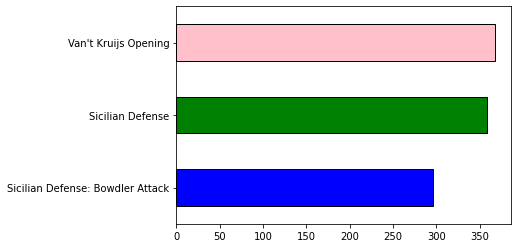

In [6]:
#Q1 Find out how many different openings are played in the data set
import matplotlib.colors as mcolors
open_count = chess_set["opening_name"].value_counts()
print(open_count.head(3))
open_count.head(3).sort_values().plot(kind='barh',color=['blue','green','pink'],edgecolor='black')
plt.show()
#This graph shows the top three most played openings, the Van't Kruijs Opening, the Sicilian Defense, and the Sicilian Defence: Bowdler Attack Variation

Resign    0.606540
Mate      0.344161
Draw      0.049298
Name: outcomes, dtype: float64


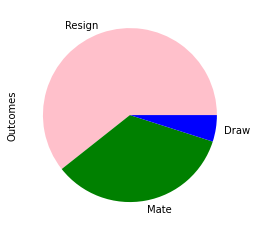

In [7]:
#Question 2 will be which chess opening results are definitive: win or loss (no draws), and how many wins and losses are there in the dataset
fig, ax = plt.subplots()
WLD = {'outoftimes':'Out Of Time','resign':'Resign','mate':'Mate','draw':'Draw'}
chess_set['outcomes']=chess_set.victory_status.map(WLD)
outcomes = chess_set.outcomes.value_counts(normalize=True)
print(outcomes)
#This code tells me there is a 55% chance of resignation, a  31% chance of a mate, an 08% chance of outoftime, and a 04% chance of a draw
outcomes.plot(kind='pie', colors = ['pink','green','blue','grey'])
ax.set_xlabel = ('Outcomes')
ax.set_ylabel('Outcomes')
plt.show()
#This solves the first of the Q2 of what are the different amount of game resolutions in the dataset. It is clear that there is a large amount of resignations with smaller amounts of mates, and even less out of times, and less draws.VKOW = chess_set[(chess_set.eins)] 

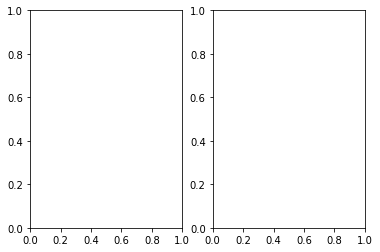

In [8]:
#The second part of Q2 is a matter of which openings result in the most amount of wins, draws, and losses
white_wins = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='white')].value_counts().sum()
black_wins = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='black')].value_counts().sum()
fig, ax = plt.subplots(1,2)

    

In [9]:
most_moves = chess_set["turns"].max()
print(most_moves)
average_moves = chess_set["turns"].mean()
print(average_moves)
least_moves = chess_set["turns"].min()
print(least_moves)
#this info is used to guage the max, min, and average amount of moves in the dataset to determine which opening usually has the most, the least, and closest to the average
#Which opening has the average of the most moves, I am thinking pivot table to compare names to averages


349
60.46599860404826
1
